# Application of ML algorithms for the implementation of algorithmic trading strategies and evaluation of their effectiveness based on the results of vectorized backtesting on historical data

I created and analyzed several machine learning models to be able to predict future market fluctuations.

Backtesting is the general method for seeing how well a strategy or model would have had done ex-post. Backtesting assesses the viability of a trading strategy by discovering how it would play out using historical data. If backtesting works, traders and analysts may have the confidence to employ it going forward. Vectorized backtesting collects data and organizes it into vectors and matrices that are processed using linear algebra methods to simulate past performance.

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

# Simple Moving Average — SMA
## Data acquisition

As a financial instrument, I used the Dow Jones FXCM Dollar Index.
> The Dow Jones FXCM Dollar Index (USDOLLAR) is an index (or measure) of the value of the United States dollar relative to a basket of four currencies: the Euro, the British Pound, the Japanese Yen, and the Australian Dollar.

Analysis based on end-of-day data.

In [3]:
df = pd.read_csv('../data/USDOLLAR_D1_2018_2022.csv', index_col='date')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2018-09-03 21:00:00 to 2022-06-21 21:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   askclose  997 non-null    int64
dtypes: int64(1)
memory usage: 15.6+ KB


In [5]:
df.head()

,askclose
date,
2018-09-03 21:00:00,12174
2018-09-04 21:00:00,12199
2018-09-05 21:00:00,12179
2018-09-06 21:00:00,12162
2018-09-07 21:00:00,12206


In [6]:
df.tail()

,askclose
date,
2022-06-15 21:00:00,12867
2022-06-16 21:00:00,12791
2022-06-17 21:00:00,12879
2022-06-20 21:00:00,12870
2022-06-21 21:00:00,12874


array([[<AxesSubplot:title={'center':'askclose'}>]], dtype=object)

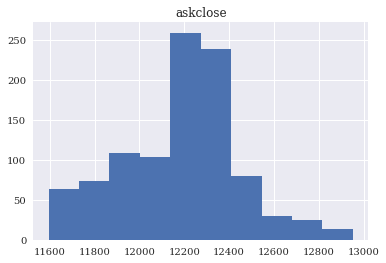

In [7]:
df.hist()

## Trading strategy research

In [8]:
SMA_1 = 50
SMA_2 = 300

# Calculates the values for the shorter SMA
df['SMA_1'] = df['askclose'].rolling(SMA_1).mean()

# Calculates the values for the longer SMA
df['SMA_2'] = df['askclose'].rolling(SMA_2).mean()

<AxesSubplot:title={'center':'Dow Jones FXCM Dollar Index price and two simple moving averages'}>

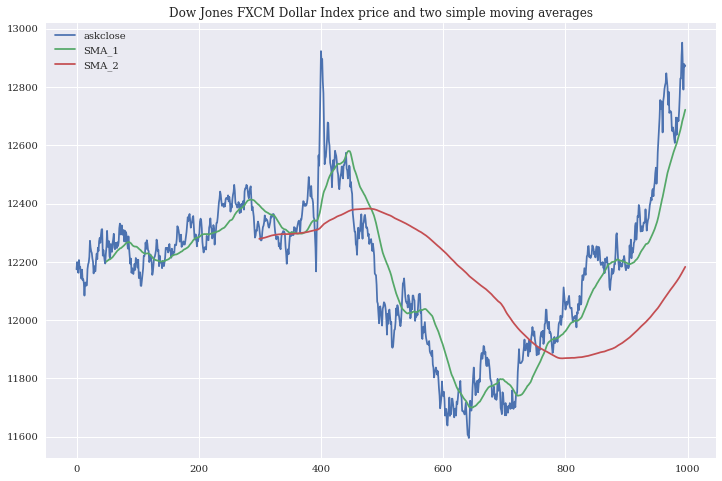

In [9]:
df.plot(figsize=(12, 8), use_index=False,
        title='Dow Jones FXCM Dollar Index price and two simple moving averages')

Open a long position when the shorter SMA is above the longer SMA. Otherwise, open a short position.

In [10]:
df.dropna(inplace=True)
df['Position'] = np.where(df['SMA_1'] > df['SMA_2'], 1, -1)

In [11]:
df.tail()

,askclose,SMA_1,SMA_2,Position
date,,,,
2022-06-15 21:00:00,12867,12689.58,12167.343333,1
2022-06-16 21:00:00,12791,12696.40,12170.796667,1
2022-06-17 21:00:00,12879,12705.48,12174.733333,1
2022-06-20 21:00:00,12870,12713.78,12178.666667,1
2022-06-21 21:00:00,12874,12721.82,12182.656667,1


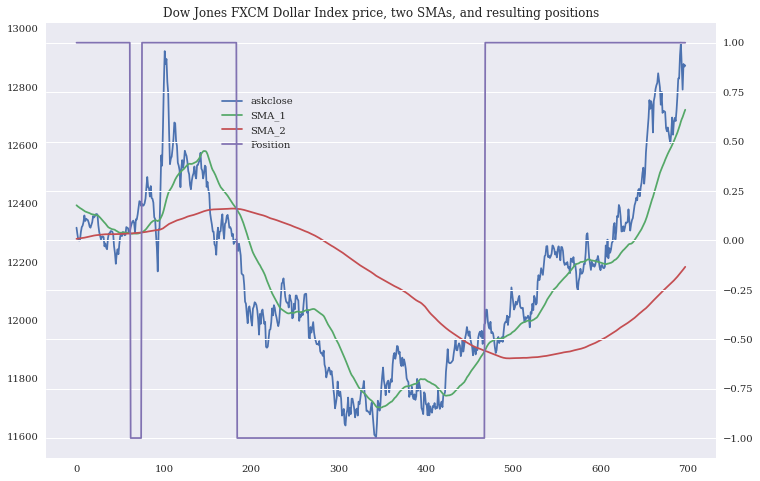

In [12]:
ax = df.plot(secondary_y='Position', figsize=(12, 8), mark_right=False, use_index=False,
             title='Dow Jones FXCM Dollar Index price, two SMAs, and resulting positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Vectorized testing on historical data

In [13]:
# Logarithmic profitability calculation
df['Profitability'] = np.log(df['askclose'] / df['askclose'].shift(1))

df['Strategy'] = df['Position'].shift(1) * df['Profitability']

In [14]:
df.round(4).head()

,askclose,SMA_1,SMA_2,Position,Profitability,Strategy
date,,,,,,
2019-10-29 21:00:00,12317,12393.96,12278.7800,1,NaN,NaN
2019-10-30 21:00:00,12295,12391.40,12279.1833,1,-0.0018,-0.0018
2019-10-31 21:00:00,12276,12388.80,12279.4400,1,-0.0015,-0.0015
2019-11-01 21:00:00,12273,12386.82,12279.7533,1,-0.0002,-0.0002
2019-11-03 22:00:00,12275,12384.38,12280.1300,1,0.0002,0.0002


In [15]:
df.dropna(inplace=True)
# Absolute profitability calculation
np.exp(df[['Profitability', 'Strategy']].sum())

Profitability    1.045222
Strategy         1.078243
dtype: float64

In [16]:
# Annual volatility calculation
df[['Profitability', 'Strategy']].std() * 252 ** 0.5

Profitability    0.042174
Strategy         0.042152
dtype: float64

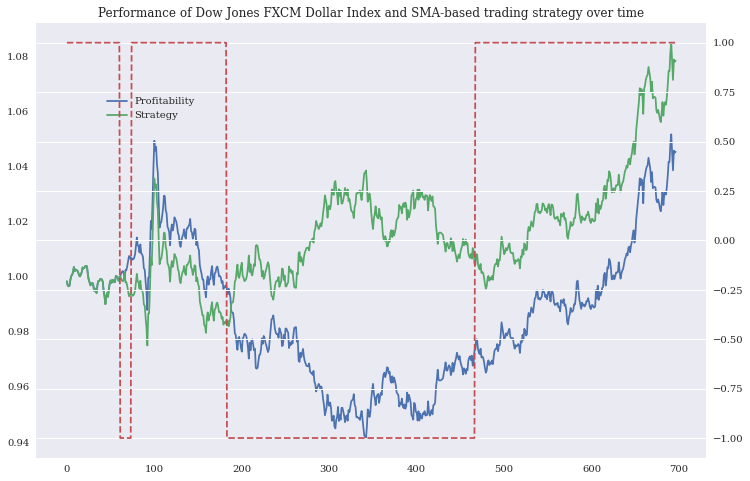

In [17]:
ax = df[['Profitability', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(12, 8), use_index=False)
df['Position'].plot(ax=ax, secondary_y='Position', style='--', use_index=False,
                    title='Performance of Dow Jones FXCM Dollar Index and SMA-based trading strategy over time')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

The selected algorithmic trading strategy is more effective than the reference investment, which assumes passive retention. The type of the trading strategy provides the same annual volatility as the benchmark investment, which results in the strategy performing better risk-adjusted.

This vectorized backtesting approach is based on a number of simplifying assumptions. I don't include transaction costs (fixed fees, spreads between bid and ask prices, borrowing costs, etc).

# Least Squares Linear Regression
## Data acquisition

As a financial instrument, I used the currency pair EUR/USD.
> The currency pair EUR/USD indicates how many U.S. dollars (the quote currency) are needed to purchase one euro (the base currency). Trading the EUR/USD currency pair is also known as trading the "euro".

Analysis based on end-of-day data.

In [18]:
df = pd.read_csv('../data/EURUSD_D1_2018_2022.csv', index_col='date')

df['Profitability'] = np.log(df / df.shift(1))
df.dropna(inplace=True)
df['Direction'] = np.sign(df['Profitability']).astype(int)

In [19]:
df.head()

,askclose,Profitability,Direction
date,,,
2018-09-03 21:00:00,1.16227,0.002110,1
2018-09-04 21:00:00,1.15830,-0.003422,-1
2018-09-05 21:00:00,1.16309,0.004127,1
2018-09-06 21:00:00,1.16241,-0.000585,-1
2018-09-07 21:00:00,1.15556,-0.005910,-1


<AxesSubplot:title={'center':'Histogram of the logarithmic profitability of the currency pair EUR/USD'}, ylabel='Frequency'>

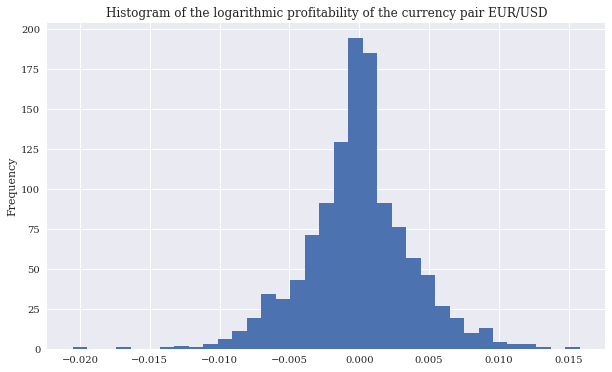

In [20]:
df['Profitability'].plot(kind='hist', bins=35, figsize=(10, 6),
                         title='Histogram of the logarithmic profitability of the currency pair EUR/USD')

The first feature (bias_1) represents the log returns of the financial time series lagged by one day. The second feature (bias_2) lags the log returns by two days.

Log returns—in contrast to prices—are stationary in general, which often is a necessary condition for the application of statistical and ML algorithms. The basic idea behind the usage of lagged log returns as features is that they might be informative in predicting future returns.

In [21]:
def create_bias(df):
    global columns
    columns = []
    for i in range(1, bias+1):
        column = f'bias_{i}'
        df[column] = df['Profitability'].shift(i)
        columns.append(column)

In [22]:
bias = 2
create_bias(df)

In [23]:
df.head()

,askclose,Profitability,Direction,bias_1,bias_2
date,,,,,
2018-09-03 21:00:00,1.16227,0.002110,1,NaN,NaN
2018-09-04 21:00:00,1.15830,-0.003422,-1,0.002110,NaN
2018-09-05 21:00:00,1.16309,0.004127,1,-0.003422,0.002110
2018-09-06 21:00:00,1.16241,-0.000585,-1,0.004127,-0.003422
2018-09-07 21:00:00,1.15556,-0.005910,-1,-0.000585,0.004127


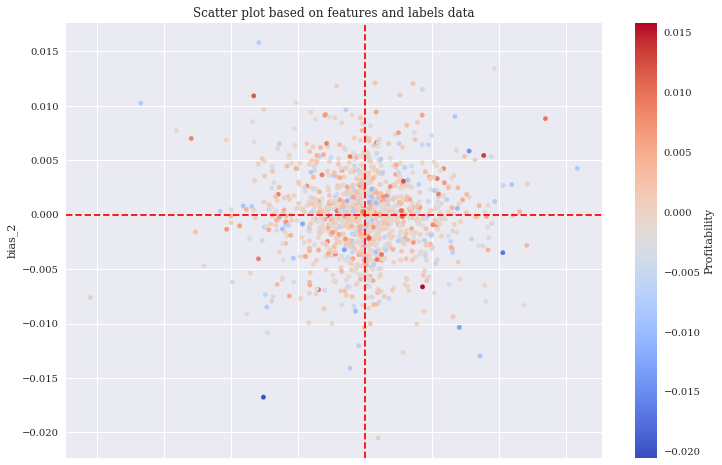

In [24]:
df.dropna(inplace=True)
df.plot.scatter(x='bias_1', y='bias_2', c='Profitability', cmap='coolwarm', figsize=(12, 8),
                colorbar=True, title='Scatter plot based on features and labels data')
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')

## Trading strategy research

In [25]:
model = LinearRegression()
df['position_1'] = model.fit(df[columns], df['Profitability']).predict(df[columns])
df['position_2'] = model.fit(df[columns], df['Direction']).predict(df[columns])

In [26]:
df[['position_1', 'position_2']].head()

,position_1,position_2
date,,
2018-09-05 21:00:00,0.000134,0.030810
2018-09-06 21:00:00,-0.000394,-0.082680
2018-09-07 21:00:00,0.000241,0.039899
2018-09-09 21:00:00,-0.000029,0.011142
2018-09-10 21:00:00,-0.000511,-0.088230


In [27]:
# The real-valued predictions are transformed to directional values
df[['position_1', 'position_2']] = np.where(df[['position_1', 'position_2']] > 0, 1, -1)
df['position_1'].value_counts()

-1    766
 1    406
Name: position_1, dtype: int64

In [28]:
df['position_2'].value_counts()

-1    759
 1    413
Name: position_2, dtype: int64

In [29]:
(df['position_1'].diff() != 0).sum()

608

In [30]:
(df['position_2'].diff() != 0).sum()

664

## Vectorized testing on historical data

In [31]:
df['strategy_1'] = df['position_1'] * df['Profitability']
df['strategy_2'] = df['position_2'] * df['Profitability']
df[['Profitability', 'strategy_1', 'strategy_2']].sum().apply(np.exp)

Profitability    0.909721
strategy_1       1.051284
strategy_2       1.092272
dtype: float64

Number of correct and false predictions.

In [32]:
(df['Direction'] == df['position_1']).value_counts()

True     598
False    574
dtype: int64

In [33]:
(df['Direction'] == df['position_2']).value_counts()

True     597
False    575
dtype: int64

<AxesSubplot:title={'center':'Performance of EUR/USD and regression-based strategies over time'}>

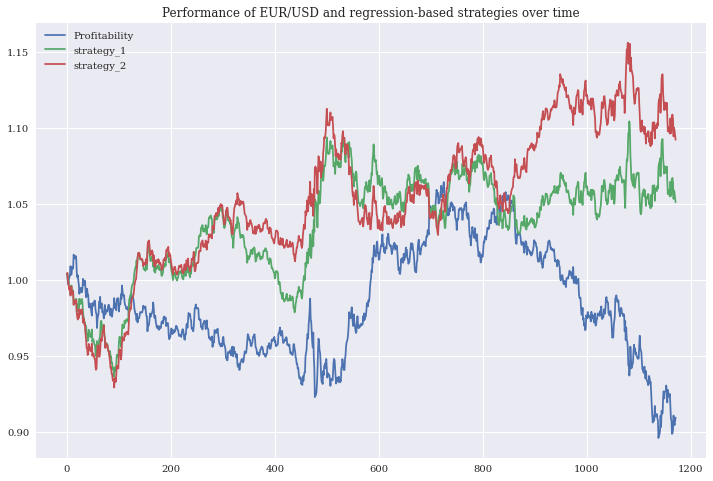

In [34]:
df[['Profitability', 'strategy_1', 'strategy_2']].cumsum().apply(np.exp).plot(figsize=(12, 8),
                                                                              use_index=False,
                                                                              title='Performance of EUR/USD and regression-based strategies over time')

# Clustering
## Data acquisition

In [35]:
df = pd.read_csv('../data/USDOLLAR_D1_2018_2022.csv', index_col='date')

df['Profitability'] = np.log(df / df.shift(1))
df.dropna(inplace=True)
df['Direction'] = np.sign(df['Profitability']).astype(int)

In [36]:
df.head()

,askclose,Profitability,Direction
date,,,
2018-09-04 21:00:00,12199,0.002051,1
2018-09-05 21:00:00,12179,-0.001641,-1
2018-09-06 21:00:00,12162,-0.001397,-1
2018-09-07 21:00:00,12206,0.003611,1
2018-09-10 21:00:00,12179,-0.002214,-1


In [37]:
bias = 2
create_bias(df)
df.dropna(inplace=True)

In [38]:
df.head()

,askclose,Profitability,Direction,bias_1,bias_2
date,,,,,
2018-09-06 21:00:00,12162,-0.001397,-1,-0.001641,0.002051
2018-09-07 21:00:00,12206,0.003611,1,-0.001397,-0.001641
2018-09-10 21:00:00,12179,-0.002214,-1,0.003611,-0.001397
2018-09-11 21:00:00,12183,0.000328,1,-0.002214,0.003611
2018-09-12 21:00:00,12158,-0.002054,-1,0.000328,-0.002214


## Trading strategy research

In [39]:
# Two clusters are chosen for the algorithm
model = KMeans(n_clusters=2, random_state=0)
model.fit(df[columns])

KMeans(n_clusters=2, random_state=0)

In [40]:
df['pos_clustering'] = model.predict(df[columns])
# Given the cluster values, the position is chosen
df['pos_clustering'] = np.where(df['pos_clustering'] == 1, -1, 1)

Text(0.5, 1.0, 'Two clusters as identified by the k-means algorithm')

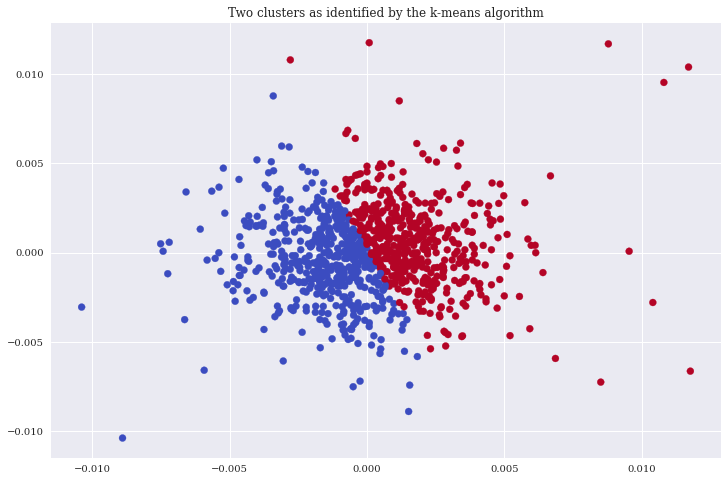

In [41]:
plt.figure(figsize=(12, 8))
plt.scatter(df[columns].iloc[:, 0],
            df[columns].iloc[:, 1],
            c=df['pos_clustering'],
            cmap='coolwarm')
plt.title('Two clusters as identified by the k-means algorithm')

## Vectorized testing on historical data

In [42]:
df['strat_clustering'] = df['pos_clustering'] * df['Profitability']
df[['Profitability', 'strat_clustering']].sum().apply(np.exp)

Profitability       1.057065
strat_clustering    1.081101
dtype: float64

In [43]:
(df['Direction'] == df['pos_clustering']).value_counts()

True     503
False    491
dtype: int64

<AxesSubplot:title={'center':'Performance of EUR/USD and k-means-based strategy over time'}>

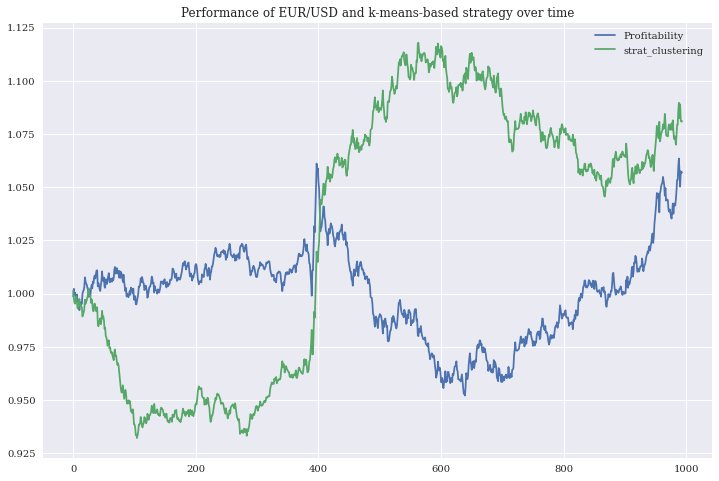

In [44]:
df[['Profitability', 'strat_clustering']].cumsum().apply(np.exp).plot(figsize=(12, 8),
                                                                      use_index=False,
                                                                      title='Performance of EUR/USD and k-means-based strategy over time')

# Classification with 2 binary features
## Data acquisition

Classification algorithms are trained and tested on binary or discretized features.

In [45]:
df = pd.read_csv('../data/EURUSD_D1_2018_2022.csv', index_col='date')

df['Profitability'] = np.log(df / df.shift(1))
df.dropna(inplace=True)
df['Direction'] = np.sign(df['Profitability']).astype(int)

bias = 2
create_bias(df)
df.dropna(inplace=True)

In [46]:
df.head()

,askclose,Profitability,Direction,bias_1,bias_2
date,,,,,
2018-09-05 21:00:00,1.16309,0.004127,1,-0.003422,0.002110
2018-09-06 21:00:00,1.16241,-0.000585,-1,0.004127,-0.003422
2018-09-07 21:00:00,1.15556,-0.005910,-1,-0.000585,0.004127
2018-09-09 21:00:00,1.15515,-0.000355,-1,-0.005910,-0.000585
2018-09-10 21:00:00,1.15960,0.003845,1,-0.000355,-0.005910


In [47]:
def create_bins(df, bins=[0]):
    global columns_bin 
    columns_bin = []
    for column in columns:
        column_bin = column + '_bin'
        df[column_bin] = np.digitize(df[column], bins=bins)
        columns_bin.append(column_bin)

In [48]:
create_bins(df)
df[columns_bin + ['Direction']].head()

,bias_1_bin,bias_2_bin,Direction
date,,,
2018-09-05 21:00:00,0,1,1
2018-09-06 21:00:00,1,0,-1
2018-09-07 21:00:00,0,1,-1
2018-09-09 21:00:00,0,0,-1
2018-09-10 21:00:00,0,0,1


## Trading strategy research

In [49]:
C = 1
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}

In [50]:
# A function that fits all models
def fit_models(df):
    models_fit = {model: models[model].fit(df[columns_bin], df['Direction']) for model in models.keys()}

# A function that derives all position values from the fitted models
def derive_pos(df):
    for i in models.keys():
        df['pos_'+i] = models[i].predict(df[columns_bin])

In [51]:
fit_models(df)
derive_pos(df)

## Vectorized testing on historical data

In [52]:
# A function that evaluates all resulting trading strategies
def evaluate_strategies(df):
    global sel
    sel = []
    for i in models.keys():
        column = 'strategy_'+i
        df[column] = df['pos_'+i] * df['Profitability']
        sel.append(column)
    sel.insert(0, 'Profitability')

In [53]:
evaluate_strategies(df)
# Some strategies might show the exact same performance
df[sel].sum().apply(np.exp)

Profitability        0.909721
strategy_log_reg     1.099210
strategy_gauss_nb    1.099224
strategy_svm         1.045009
dtype: float64

<AxesSubplot:title={'center':'Performance of EUR/USD and classification-based trading strategies (two binary lags) over time'}>

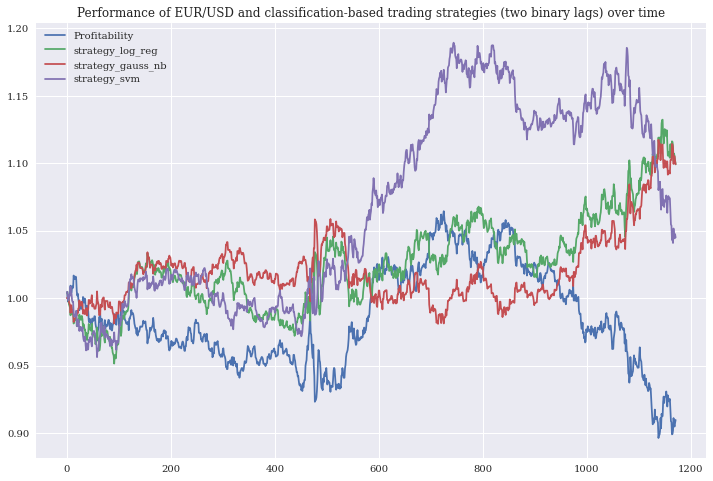

In [54]:
df[sel].cumsum().apply(np.exp).plot(figsize=(12, 8), use_index=False,
                                    title='Performance of EUR/USD and classification-based trading strategies (two binary lags) over time')

# Classification with 5 binary features
## Data acquisition

In [55]:
df = pd.read_csv('../data/EURUSD_D1_2018_2022.csv', index_col='date')

df['Profitability'] = np.log(df / df.shift(1))
df.dropna(inplace=True)
df['Direction'] = np.sign(df['Profitability']).astype(int)

# Five lags of the log returns series are now used
bias = 5
# The real-valued features data is transformed to binary data
create_bias(df)
df.dropna(inplace=True)
create_bins(df)

In [56]:
df[columns_bin].head()

,bias_1_bin,bias_2_bin,bias_3_bin,bias_4_bin,bias_5_bin
date,,,,,
2018-09-09 21:00:00,0,0,1,0,1
2018-09-10 21:00:00,0,0,0,1,0
2018-09-11 21:00:00,1,0,0,0,1
2018-09-12 21:00:00,1,1,0,0,0
2018-09-13 21:00:00,1,1,1,0,0


## Trading strategy research

In [57]:
df.dropna(inplace=True)
fit_models(df)
derive_pos(df)

## Vectorized testing on historical data

In [58]:
evaluate_strategies(df)
df[sel].sum().apply(np.exp)

Profitability        0.911878
strategy_log_reg     1.252237
strategy_gauss_nb    1.161749
strategy_svm         1.463655
dtype: float64

<AxesSubplot:title={'center':'Performance of EUR/USD and classification-based trading strategies (five binary lags) over time'}>

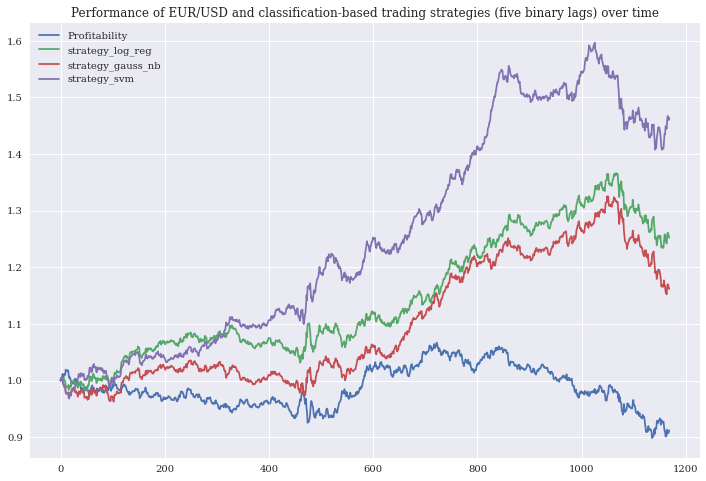

In [59]:
df[sel].cumsum().apply(np.exp).plot(figsize=(12, 8), use_index=False,
                                    title='Performance of EUR/USD and classification-based trading strategies (five binary lags) over time')

# Classification with 5 discretized features
## Data acquisition

Mean and standard deviation measures are used to discretize features.

In [60]:
df = pd.read_csv('../data/EURUSD_D1_2018_2022.csv', index_col='date')

df['Profitability'] = np.log(df / df.shift(1))
df.dropna(inplace=True)
df['Direction'] = np.sign(df['Profitability']).astype(int)

bias = 5
create_bias(df)
df.dropna(inplace=True)
# The mean log return and the standard deviation are used to digitize the features data
mu = df['Profitability'].mean()
v = df['Profitability'].std()
bins = [mu - v, mu, mu + v]
create_bins(df, bins)

In [61]:
df[columns_bin].head()

,bias_1_bin,bias_2_bin,bias_3_bin,bias_4_bin,bias_5_bin
date,,,,,
2018-09-09 21:00:00,0,1,3,1,2
2018-09-10 21:00:00,1,0,1,3,1
2018-09-11 21:00:00,3,1,0,1,3
2018-09-12 21:00:00,2,3,1,0,1
2018-09-13 21:00:00,2,2,3,1,0


## Trading strategy research

In [62]:
df.dropna(inplace=True)
fit_models(df)
derive_pos(df)

## Vectorized testing on historical data

In [63]:
evaluate_strategies(df)
df[sel].sum().apply(np.exp)

Profitability        0.911878
strategy_log_reg     1.205748
strategy_gauss_nb    1.214443
strategy_svm         2.453206
dtype: float64

<AxesSubplot:title={'center':'Performance of EUR/USD and classification-based trading strategies (five digitized lags) over time'}>

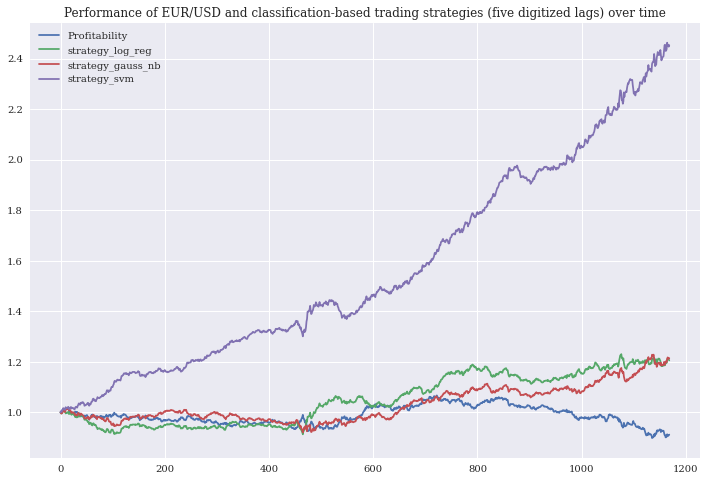

In [64]:
df[sel].cumsum().apply(np.exp).plot(figsize=(12, 8), use_index=False,
                                    title='Performance of EUR/USD and classification-based trading strategies (five digitized lags) over time')